# Investigating September DALEC Issue in More Detail

Going to look at the different sensor channels and see if it looks like an issue with one sensor (eg. Ed), or all of them.

In [18]:
import os
import sys
lib_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../functions/'))
sys.path.append(lib_path)
# need to append our functions dir to the path! 
import dalecLoad as dl

import pandas as pd
import SD_NC_loading as sdl
import time

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../data/'))

log = dl.load_DALEC_dir(os.path.join(data_path, 'Jul-Aug'),#, # choose data folder here
                        file_names=['LOG_0071.dtf', 'LOG_0082.dtf',
                                    'LOG_0085.dtf', 'LOG_0099.dtf',
                                    'LOG_0097.dtf', 'LOG_0098.dtf', 
                                    'LOG_0100.dtf']) # remove file_names to load all files in directory

loading ... C:\Users\daa5\Project\DALEC_processing\data\Jul-Aug\LOG_0071.dtf
loading ... C:\Users\daa5\Project\DALEC_processing\data\Jul-Aug\LOG_0082.dtf
loading ... C:\Users\daa5\Project\DALEC_processing\data\Jul-Aug\LOG_0085.dtf
loading ... C:\Users\daa5\Project\DALEC_processing\data\Jul-Aug\LOG_0099.dtf
loading ... C:\Users\daa5\Project\DALEC_processing\data\Jul-Aug\LOG_0097.dtf
loading ... C:\Users\daa5\Project\DALEC_processing\data\Jul-Aug\LOG_0098.dtf
loading ... C:\Users\daa5\Project\DALEC_processing\data\Jul-Aug\LOG_0100.dtf


In [33]:
log

Integration Time Roll     Temp  \
Channel spectral_ind Datetime                                                  
Ed      21           2022-07-28 10:00:17.067                64  0.0  25.8125   
Lsky    217          2022-07-28 10:00:17.067                 8  0.0  25.5625   
        218          2022-07-28 10:00:17.067                 8  0.0  25.5625   
        219          2022-07-28 10:00:17.067                 8  0.0  25.5625   
        220          2022-07-28 10:00:17.067                 8  0.0  25.5625   
...                                                        ...  ...      ...   
        21           2022-09-05 15:59:58.686                11  0.0  37.5625   
        22           2022-09-05 15:59:58.686                11  0.0  37.5625   
        23           2022-09-05 15:59:58.686                11  0.0  37.5625   
        25           2022-09-05 15:59:58.686                11  0.0  37.5625   
Lu      220          2022-09-05 15:59:58.686                 1  0.0   35.125   

                                                     Lat  Saturation Flag  \
Channel spectral_ind Datetime                                               
Ed      21           2022-07-28 10:00:17.067  56.1468505                0   
Lsky    217          2022-07-28 10:00:17.067  56.1468505                0   
        218          2022-07-28 10:00:17.067  56.1468505                0   
        219          2022-07-28 10:00:17.067  56.1468505                0   
        220          2022-07-28 10:00:17.067  56.1468505                0   
...                                                  ...              ...   
        21           2022-09-05 15:59:58.686  56.1468505                0   
        22           2022-09-05 15:59:58.686  56.1468505                0   
        23           2022-09-05 15:59:58.686  56.1468505                0   
        25           2022-09-05 15:59:58.686  56.1468505                0   
Lu      220          2022-09-05 15:59:58.686  56.1468505                0   

                                               Relaz Heading GPS_Fix Gearpos  \
Channel spectral_ind Datetime                                                  
Ed      21           2022-07-28 10:00:17.067  -132.8   357.1       F   -98.5   
Lsky    217          2022-07-28 10:00:17.067  -132.8   357.1       F   -98.5   
        218          2022-07-28 10:00:17.067  -132.8   357.1       F   -98.5   
        219          2022-07-28 10:00:17.067  -132.8   357.1       F   -98.5   
        220          2022-07-28 10:00:17.067  -132.8   357.1       F   -98.5   
...                                              ...     ...     ...     ...   
        21           2022-09-05 15:59:58.686   131.4    16.0       A  -104.3   
        22           2022-09-05 15:59:58.686   131.4    16.0       A  -104.3   
        23           2022-09-05 15:59:58.686   131.4    16.0       A  -104.3   
        25           2022-09-05 15:59:58.686   131.4    16.0       A  -104.3   
Lu      220          2022-09-05 15:59:58.686   131.4    16.0       A  -104.3   

                                                      Lon Voltage Solar Azi  \
Channel spectral_ind Datetime                                                 
Ed      21           2022-07-28 10:00:17.067  -3.92305679    11.6     129.9   
Lsky    217          2022-07-28 10:00:17.067  -3.92305679    11.6     129.9   
        218          2022-07-28 10:00:17.067  -3.92305679    11.6     129.9   
        219          2022-07-28 10:00:17.067  -3.92305679    11.6     129.9   
        220          2022-07-28 10:00:17.067  -3.92305679    11.6     129.9   
...                                                   ...     ...       ...   
        21           2022-09-05 15:59:58.686  -3.92305679    11.4     244.6   
        22           2022-09-05 15:59:58.686  -3.92305679    11.4     244.6   
        23           2022-09-05 15:59:58.686  -3.92305679    11.4     244.6   
        25           2022-09-05 15:59:58.686  -3.92305679    11.4     244.6   
Lu      220   

In [107]:
log[' Integration Time'] = log[' Integration Time'].astype(int)
result = dl.resampleMultiLog(log, method='median', freq='20min')
df_gridded = dl.uniform_grid_spectra_multi(result, resample_to_SDs=False)
df_gridded

Lu_median  Lsky_median  Ed_median  Rrs_median
Date                Wavelength                                               
2022-07-28 10:00:00 400.0        0.002570     0.090847   0.201739    0.000129
                    401.0        0.002645     0.094296   0.209034    0.000025
                    402.0        0.002718     0.096305   0.216329    0.000100
                    403.0        0.002791     0.098314   0.221634    0.000171
                    404.0        0.002839     0.100324   0.224302    0.000133
...                                   ...          ...        ...         ...
2022-09-05 15:40:00 996.0        0.000000     0.044790   0.126736   -0.009896
                    997.0        0.000000     0.044696   0.126257   -0.009912
                    998.0        0.000000     0.044602   0.125779   -0.009929
                    999.0        0.000000     0.044496   0.125024   -0.009965
                    1000.0       0.000000     0.044391   0.124269   -0.010002

[58297 rows x 4 columns]

In [108]:
result

Integration Time  Saturation Flag  \
Channel spectral_ind Datetime                                                  
Ed      21           2022-07-28 10:00:00               64.0              0.0   
                     2022-07-28 10:20:00               64.0              0.0   
                     2022-07-28 10:40:00               64.0              0.0   
                     2022-07-28 11:00:00               47.0              0.0   
                     2022-07-28 11:20:00               35.0              0.0   
...                                                     ...              ...   
Lu      220          2022-09-05 14:20:00                1.0              0.0   
                     2022-09-05 14:40:00                1.0              0.0   
                     2022-09-05 15:00:00                1.0              0.0   
                     2022-09-05 15:20:00                1.0              0.0   
                     2022-09-05 15:40:00                1.0              0.0   

                                          Spectral Magnitude  
Channel spectral_ind Datetime                                 
Ed      21           2022-07-28 10:00:00            0.138401  
                     2022-07-28 10:20:00            0.146476  
                     2022-07-28 10:40:00            0.199950  
                     2022-07-28 11:00:00            0.266282  
                     2022-07-28 11:20:00            0.268995  
...                                                      ...  
Lu      220          2022-09-05 14:20:00            0.000000  
                     2022-09-05 14:40:00            0.000000  
                     2022-09-05 15:00:00            0.000000  
                     2022-09-05 15:20:00            0.000000  
                     2022-09-05 15:40:00            0.000000  

[58200 rows x 3 columns]

In [35]:
df_gridded['date_only'] = df_gridded.index.get_level_values('Date').date

### Rrs

We can see that the data from the 8th Aug looks good, whereas the data from the 9th Sept is weird.

Here the error bar area is indicating 1 standard deviation. Note that setting `ci='sd'` is considerably faster than the standard `ci` method.

<AxesSubplot:xlabel='Wavelength', ylabel='Rrs_median'>

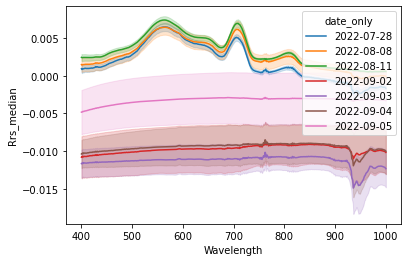

In [36]:
sns.lineplot(data=df_gridded, x='Wavelength', y='Rrs_median', hue='date_only', ci='sd')

### Looking at the individual channels

This seems to highlight the issue very well. We get a range of different magnitude curves for `Lsky` and `Ed`, with no obvious differences between the September and August data for these 2 channels.

Looking at the `Lu` channel we can see that all of the September data appears to have been read in as `0.00` - worth checking the values of this properly.

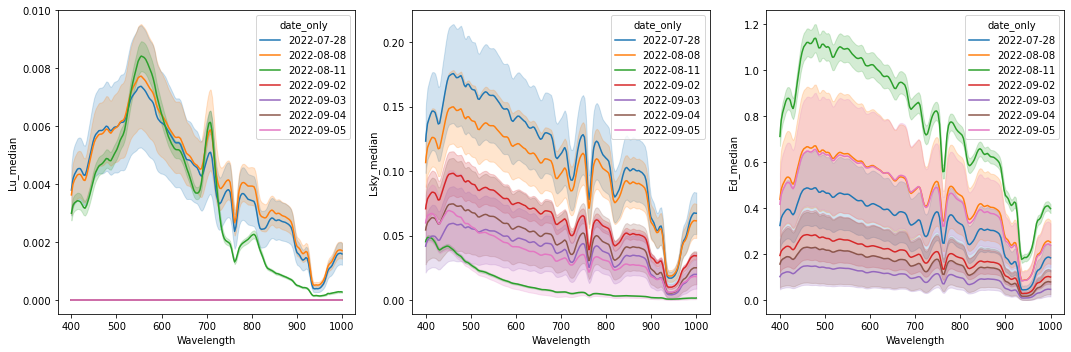

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.lineplot(data=df_gridded, x='Wavelength', y='Lu_median', hue='date_only', ax=ax[0], ci='sd')
sns.lineplot(data=df_gridded, x='Wavelength', y='Lsky_median', hue='date_only', ax=ax[1], ci='sd')
sns.lineplot(data=df_gridded, x='Wavelength', y='Ed_median', hue='date_only', ax=ax[2], ci='sd')
plt.tight_layout()
plt.show()

## All Lu from September is zero

Just to confirm, we check explicity if `df_gridded['Lu_median']==0`, and find that for all data in September, this is True.

I've looked directly at `LOG_0098.dtf` in excel and confirmed that all `Lu` readings are exactly `0`. Uh oh.

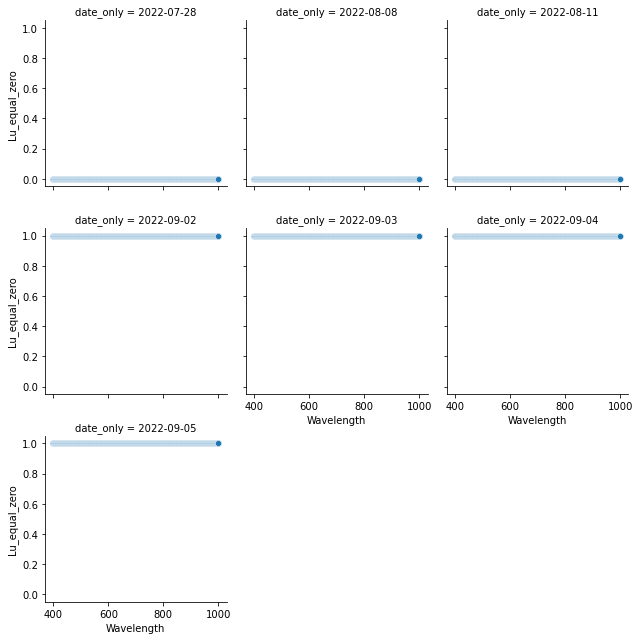

In [67]:
df_gridded['Lu_equal_zero'] = pd.DataFrame(df_gridded['Lu_median']==0)
grid=sns.FacetGrid(df_gridded.reset_index(), col='date_only', col_wrap=3)
grid.map(sns.scatterplot, 'Wavelength', 'Lu_equal_zero')
plt.show()

##  Integration Time

I think the issue might be with the integration time. Let's check this out!

For the `Lu` channel we see that in September, the integration time is constant at a very low value, which is `1 ms`. This indicates that perhaps there has been some issue with the automatic integration time setting for this channel. I would expect that we should see some higher values of integration time than in August as there is generally a bit less light, and I had increased the number of sampling hours to include earlier morning and later afternoon where there should be lower light levels.

Furthermore, we see that the integration time of the other channels appears to be set properly throughout the September period, indicating that the issue is only present on the `Lu` channel.

So, when I next have the DALEC to hand, I should see what happens if I disable automatic integration time calculation.

In [110]:
result['date'] = result.index.get_level_values('Datetime').date

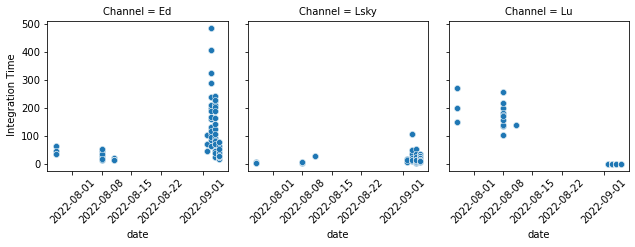

In [121]:
grid=sns.FacetGrid(result.reset_index(), col='Channel', despine=False)
grid.map(sns.scatterplot, 'date', ' Integration Time')

for axes in grid.axes.flat:
    axes.xaxis.set_ticks(axes.get_xticks())
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.show()